# Report: Analyzing the Pricing Trends in Hotel Booking Industry

### Contents:

1. Introduction
2. Methods & Data Sources
3. Data Loading & Inspection
4. Results
5. Conclusion

## 1. Introduction

In the dynamic realm of the hospitality industry, hotel booking platforms have become the epicenter of a complex interplay between consumer demand, market competition, and pricing strategies. As travelers increasingly rely on online platforms to secure accommodations, hotels find themselves at the nexus of a challenging landscape where strategic pricing decisions can profoundly impact profitability and guest satisfaction.

This analysis delves into the intricate world of hotel booking data, aiming to unravel the underlying patterns and strategies that shape the pricing landscape. By scrutinizing a dataset rich in information related to hotel bookings, we embark on a journey to decode the pricing strategies employed by various establishments. Our goal is to unearth insights that not only shed light on current industry practices but also empower hoteliers and stakeholders to optimize their pricing strategies for sustained success.

## 2. Methods & Data Sources


### Data-Source 1: Hotel Booking Demand


Metadata URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Data URL: 
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/download?datasetVersionNumber=1

Data Type: CSV

This data set contains booking information for city and resort hotels. It includes information such as when the booking was made, length of stay, the number of adults, children, and babies, and the number of available parking spaces, among other things.

In terms of data transformations, I undertook the following steps:

- Removal of outliers
- Selection of columns related for pricing: 
    - **hotel:** To distinguish between different types of hotels.

    - **arrival_date:** For temporal analysis, if needed.

    - **lead_time:** The number of days between the booking date and arrival date might influence prices.

    - **room_type:** Different room types may have different prices.

    - **adr:** Average Daily Rate, the key column representing the price.

    - **adults:** Number of adults.


### Data-Source 2: New York City Airbnb Open Data

Metadata URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Data URL: 
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/download?datasetVersionNumber=3

Data Type: CSV

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In terms of data transformations, I undertook the following steps:

- **Removal of outliers**
- **Selection of columns related for pricing:**
    - **neighbourhood_group:** To analyze price variations by neighborhood.

    - **room_type:** Different types of rooms may have different prices.

    - **price**: The key column representing the price.

    - **availability_365**: To explore how availability might relate to pricing.

    - **number_of_reviews**: May provide insights into price and popularity.



Both the datasets are independent of each other. The Hotel Booking dataset contains data of city hotels and resort hotels whereas the AirBnB dataset contains details of entire homes/apartments, private rooms, shared rooms.

We will perform analysis on both the details and check if same or similar pricing strategies can be applied or not.

## 3. Data Loading & Inspection

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# get data from hotel booking table
hotel_df = pd.read_sql_table('hotel_bookings', 'sqlite:///../data/hotel_bookings.sqlite')
# print first 5 rows of the table
hotel_df.head()

,hotel,arrival_date_month,lead_time,adr,adults
0,Resort Hotel,July,342,0.0,2
1,Resort Hotel,July,737,0.0,2
2,Resort Hotel,July,7,75.0,1
3,Resort Hotel,July,13,75.0,1
4,Resort Hotel,July,14,98.0,2


In [3]:
# summary
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel               115597 non-null  object 
 1   arrival_date_month  115597 non-null  object 
 2   lead_time           115597 non-null  int64  
 3   adr                 115597 non-null  float64
 4   adults              115597 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ MB


In [4]:
# get data from airbnb table
airbnb_df = pd.read_sql_table('airbnb', 'sqlite:///../data/airbnb.sqlite')
# print first 5 rows of the table
airbnb_df.head()

,neighbourhood_group,room_type,price,availability_365,number_of_reviews
0,Brooklyn,Private room,149,365,9
1,Manhattan,Entire home/apt,225,355,45
2,Manhattan,Private room,150,365,0
3,Brooklyn,Entire home/apt,89,194,270
4,Manhattan,Entire home/apt,80,0,9


In [5]:
# summary
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  45918 non-null  object
 1   room_type            45918 non-null  object
 2   price                45918 non-null  int64 
 3   availability_365     45918 non-null  int64 
 4   number_of_reviews    45918 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


## 4. Results

## First, we will do the analysis for hotel booking data

### Question1: Does the prices vary depending on the type of hotel?

To analyse this, I used a box plot to check the variation in the prices.

Here's a breakdown of the chart's components:

- **Box:** The box represents the central 50% of the data. The median price, which is the middle value when all the prices are ranked from least to greatest, is represented by the line inside the box.


- **Whiskers:** The whiskers extend from the box to the outermost data points that are within 1.5 times the interquartile range (IQR) of the median. The IQR is the difference between the third quartile (Q3) and the first quartile (Q1).


- **Outliers:** Data points that fall outside the whiskers are considered outliers and are plotted as individual points.

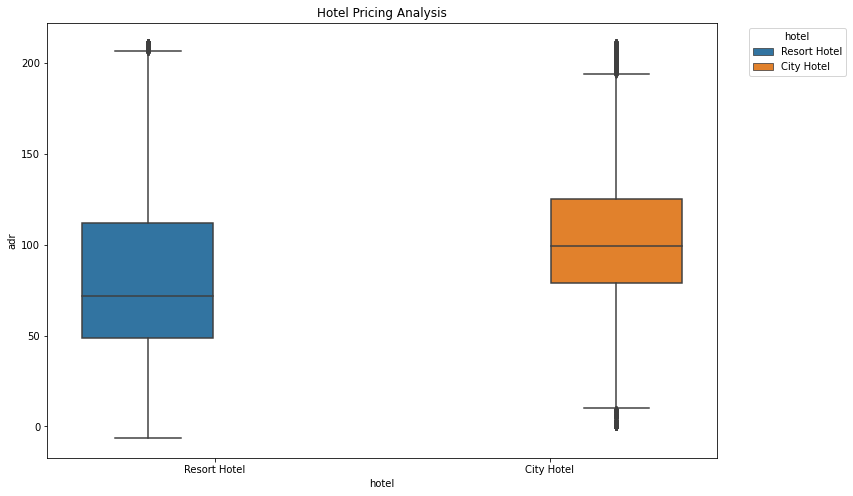

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='hotel', y='adr', hue='hotel', data=hotel_df)
plt.legend(title="hotel", loc="upper right", bbox_to_anchor=(1.20, 1))
plt.title('Hotel Pricing Analysis')
plt.show()

Based on this data, we can infer the following pricing strategies:

- **Resort hotels:** Resort hotels typically charge higher prices than city hotels due to their location, amenities, and target clientele. They aim to appeal to tourists and vacationers who are willing to pay a premium for a luxurious and relaxing experience.


- **City hotels:** City hotels cater to business travelers and budget-conscious travelers who prioritize location and convenience over luxury. They aim to offer competitive rates while providing basic amenities and easy access to transportation and attractions.

### Question2: Does the prices vary depending on the seasonality?

To analyse this, I used a box plot to check the variation in the prices.

Here's a breakdown of the chart's components:

- **Y-axis (Vertical):** Represents the average daily rate. It’s the average amount that a guest pays per day.


- **X-axis (Horizontal):** Represents the months of the year, from July to June.


- **Line Trend:** The line shows the change in ADR over the course of these months.

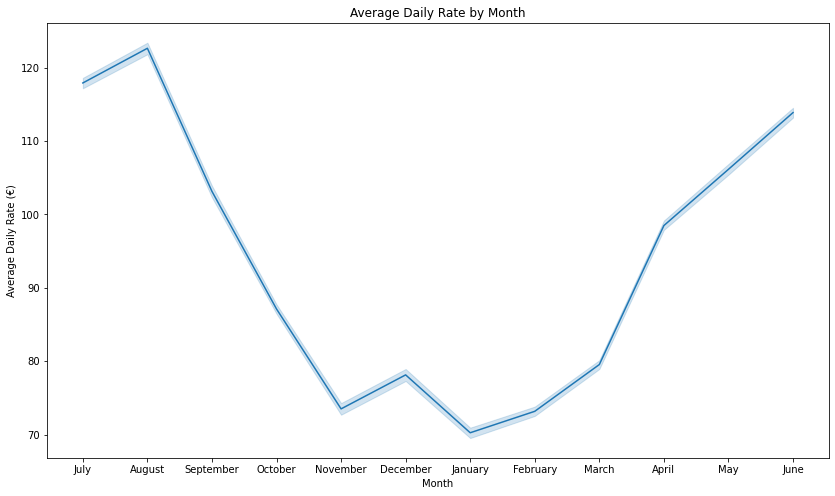

In [7]:
# ### Seasonal Trends in Pricing
#
# Visualize the average daily rate (ADR) by month:

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='arrival_date_month',
    y='adr',
    data=hotel_df
)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (€)')
plt.title('Average Daily Rate by Month')
plt.show()

Looking at the trend:

- **Peak Season:** There’s a peak in July, which could indicate the start of a high demand season (often summer in many regions), leading to higher rates.


- **Sharp Decline:** After July, there’s a sharp decline that continues until November. This could be indicative of the end of the peak season and the start of the off-season, where rates are reduced to attract guests.


- **Lowest Rates:** The lowest rates are observed around November and December, which may correspond to the least busy time for the hotel.


- **Increase in Rates:** From January onwards, there’s a steady increase in rates, suggesting a ramp-up to another busy season or possibly reflecting an increase in demand due to events or holidays.


- **Recovery to Peak Rates:** By June, the rates have recovered back to the level seen in the previous July, indicating the cycle is about to repeat, likely entering another high season.

Based on this data, we can infer the following pricing strategies:

- **Early Bird Discounts:** Encourage bookings during the off-peak season by offering discounts to guests who book their stay well in advance. This could help in increasing the occupancy during the low-demand months.


- **Non-Refundable Rates:** Offer non-refundable rates at a discount for peak times to ensure guaranteed revenue.


- **Event-Based Pricing:** If there are events in the local area that increase demand, adjust pricing accordingly to capitalize on the higher demand.


- **Seasonal Packages:** Create attractive packages for periods with traditionally lower rates. These could include special events, local attractions, or seasonal activities that are unique to the location.

### Question3: Does the prices vary depending on the how far the advanced bookings are made?

To analyse this, I used a scatter plot to check the variation in the prices.

Here's a breakdown of the chart's components:

- **X-axis (Booking Lead Time):** This represents the number of days in advance that the booking was made.


- **Y-axis (Price):** This shows the price for the booking in what is likely a currency unit.


- **Data Points:** Each dot on the graph represents an individual booking, plotted according to how many days in advance the booking was made and the price paid.


- **Trend Line (Red Dashed Line):** This line is typically used to indicate the overall trend or relationship between the two variables.

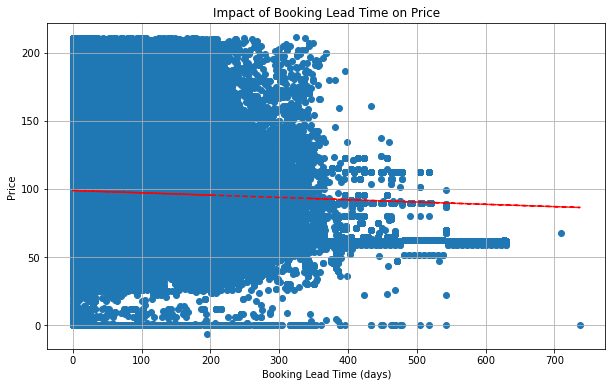

In [8]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(hotel_df['lead_time'], hotel_df['adr'])

# Adding a trend line
z = np.polyfit(hotel_df['lead_time'], hotel_df['adr'], 1)
p = np.poly1d(z)
plt.plot(hotel_df['lead_time'], p(hotel_df['lead_time']), "r--")

# Adding titles and labels
plt.title('Impact of Booking Lead Time on Price')
plt.xlabel('Booking Lead Time (days)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### Looking at the trend:

The scatter plot suggests that there is a wide range of prices that customers are willing to pay regardless of how far in advance they book, as indicated by the spread of data points and the relatively flat trend line.

Based on this data, we can infer the following pricing strategies:

- **Price Optimization for Peak Booking Windows:** The data points suggest certain periods where bookings are more frequent (e.g., within 100 days of lead time). Optimize prices during these peak booking windows to maximize revenue.


- **Analyzing Other Factors:** Since the lead time doesn't strongly affect pricing, analyze other factors that might, such as room type, season, or special events, and adjust prices accordingly.

## Now, we will do the analysis for AirBnB data

### Question1: Does the prices vary depending on the location?



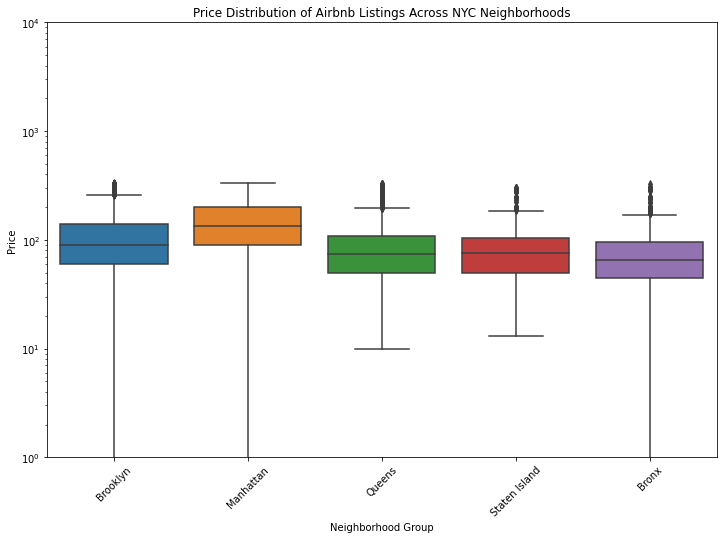

In [9]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=airbnb_df)
plt.title('Price Distribution of Airbnb Listings Across NYC Neighborhoods')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.yscale('log')  # Using log scale due to wide range of prices
plt.ylim(1, 10000)  # Setting limits to exclude extreme outliers
plt.xticks(rotation=45)
plt.show()

#### From this plot, we can observe that:

- Manhattan has the highest median price, and the range of prices (IQR) is also broader compared to the other neighborhoods, indicating a greater disparity in pricing within Manhattan.


- Brooklyn follows Manhattan with the second-highest median price and also shows a wide range of prices, but with fewer extreme outliers than Manhattan.


- Queens, Staten Island, and the Bronx have lower median prices and a narrower IQR, indicating more consistency in pricing within these neighborhoods.


- The number of outliers in Manhattan and Brooklyn suggests that there are quite a few listings that are significantly more expensive than the typical listings in these areas.


- Prices in the Bronx appear to be the most affordable, with the lowest median and fewer high-priced listings.

#### Looking at the trend:

- **Dynamic Pricing:** Adjust prices dynamically based on the demand observed in the different neighborhoods. For instance, listings in Manhattan and Brooklyn could have higher prices due to higher demand, but these should be adjusted according to seasonality and special events that could increase demand further.


- **Premium Pricing for Manhattan and Brooklyn:** Given that these areas have a higher median price and a significant range of prices, hosts in these neighborhoods could position their listings as premium offerings. They could justify higher prices by providing additional amenities, luxury features, or unique experiences.


- **Value Pricing in Queens, Staten Island, and Bronx:** Since these areas have a lower median price and fewer outliers, hosts could adopt a value pricing strategy to attract budget-conscious travelers. They could focus on providing the essentials at a competitive price, ensuring clean and comfortable accommodations without extra frills.

### Question2: Does the prices differ for different types of properties (e.g., entire homes, private rooms, shared rooms) depending on number of reviews?

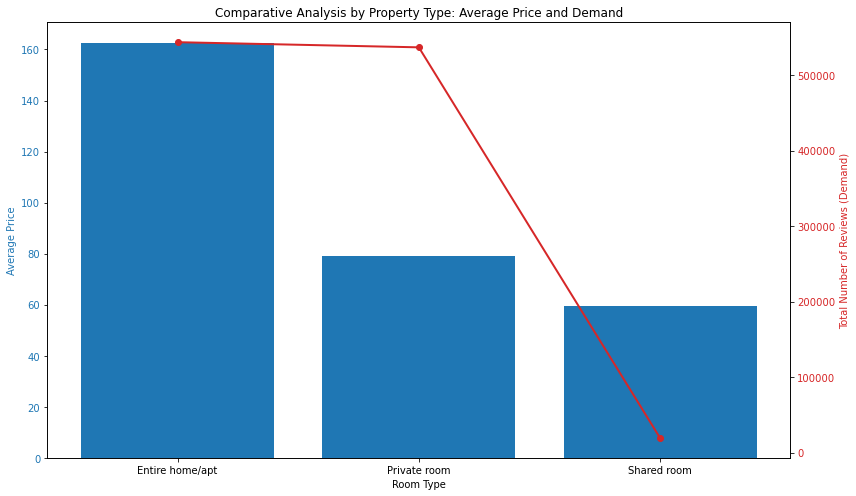

In [10]:
# Grouping the data by room type and calculating average price and demand (measured by number of reviews)
room_type_stats = airbnb_df.groupby('room_type').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'  # Sum of reviews as a proxy for demand
}).reset_index()

# To visualize both price and demand, we can create a bar chart for prices and a line chart for demand on the same figure.
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar chart for average prices
color = 'tab:blue'
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Average Price', color=color)
ax1.bar(room_type_stats['room_type'], room_type_stats['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to display the demand
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Number of Reviews (Demand)', color=color)
ax2.plot(room_type_stats['room_type'], room_type_stats['number_of_reviews'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Comparative Analysis by Property Type: Average Price and Demand')
fig.tight_layout()

plt.show()

The chart above presents a comparative analysis by property type, displaying both the average price and demand for each type of Airbnb listing in New York City. The blue bars represent the average price for each room type, while the red line indicates demand, as proxied by the total number of reviews.

#### From the chart, we can observe the following:

- **Entire home/apt:** This category has the highest average price, which indicates that guests are willing to pay more for the privacy and space offered by an entire home or apartment. It also has a high demand, as shown by the significant number of reviews.


- **Private room:** The average price for private rooms is lower than for entire homes or apartments, which is expected given the reduced privacy and shared common spaces. The demand for private rooms is also high, almost matching that of entire homes, suggesting that this is a popular choice for budget-conscious travelers.


- **Shared room:** Shared rooms have the lowest average price, reflecting the minimal privacy and space provided. The demand for shared rooms is significantly lower than for the other two categories, as indicated by the much smaller number of reviews.

#### The insights from this chart can inform several strategic decisions:

- Hosts with entire homes or apartments might consider targeting their marketing to travelers who value privacy and space and are willing to pay a premium for it.


- The private room market is competitive, with high demand. Hosts offering private rooms should focus on providing exceptional value and differentiating their offerings.


- Shared rooms have less demand and lower prices, suggesting a niche market. Hosts might target backpackers, students, or solo travelers looking for the most economical options.


- Pricing strategies should be adjusted according to the type of room offered, with entire homes/apartments commanding higher prices and shared rooms positioned at lower price points.

## 5. Conclusion

The hotel booking dataset includes detailed information on both city and resort hotels, such as booking dates, lengths of stay, the number of occupants, and the average daily rate (ADR), which is a critical metric for pricing. The Airbnb dataset provides a snapshot of listing activities in NYC, offering insights into price variations by neighborhood, room types, and the relationship between pricing and popularity, as indicated by the number of reviews.

Despite the datasets being independent, with the hotel dataset focused on traditional accommodation and the Airbnb dataset on shared economy-based lodging, the analyses pursued similar objectives: to understand how prices are set and what factors most significantly affect pricing decisions. Both sectors are influenced by various factors, including the type of accommodation, location, time of booking, and consumer demand.

For the hotel industry, strategic decisions may involve adjusting prices based on booking lead times and anticipated occupancy, while for Airbnb listings, prices may be more influenced by neighborhood desirability and room type. In both cases, the analyses sought to inform stakeholders on how to optimize their pricing strategies to balance profitability with guest satisfaction.

From this, we can conclude that while the specific factors influencing pricing may vary between traditional hotels and Airbnb listings, the overarching principles of dynamic pricing, market understanding, and value proposition remain central to both. The insights derived from these analyses could enable both hoteliers and Airbnb hosts to refine their pricing strategies, considering the unique characteristics of their offerings and market demand patterns.

To move forward, both sectors may consider implementing flexible pricing models that can quickly adapt to changing market conditions. Additionally, focusing on enhancing the value provided to customers could justify price premiums and help differentiate offerings in a competitive market. Overall, the findings underscore the importance of data-driven decision-making in the hospitality industry's pricing strategies.